# In this project, data about human evolution will be analyzed to understand how various environmental factors shaped hominid evolution

### Data from this project was downloaded from Kaggle: https://www.kaggle.com/datasets/santiago123678/biological-data-of-human-ancestors-data-sets?select=Homininos_DataSet+%281%29.csv

## Import data into a pandas dataframe:

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

ev_data = pd.read_csv('Homininos_DataSet (1).csv')
print(ev_data.head(10))

                       Genus_&_Specie        Time Location            Zone  \
0          Australopithecus Anamensis   4.2- 3.9    Africa        oriental   
1  hominino Sahelanthropus tchadensis           7   Africa         central   
2          Australopithecus Afarensis  3.9 - 2.9    Africa        oriental   
3  hominino Sahelanthropus tchadensis           7   Africa         central   
4                Homo Heidelbergensis     500-250   Europa  central-europe   
5                 Paranthropus Boisei    2.3-1.2    Africa        oriental   
6                        Homo Erectus    1.3-1.1     Asia      easter-Asia   
7                         Homo Naledi     300-225   Africa           south   
8                      Homo Georgicus         1.8    Asia         euroAsia   
9             Australopithecus Sediba         1.9   Africa           south   

    Current_Country         Habitat  Cranial_Capacity  Height  Incisor_Size  \
0             Kenya  forest-gallery            281.19  132.33 

# Clean up a little bit:

In [389]:
ev_data = ev_data.drop(columns=['Torus_Supraorbital', 'Canines_Shape', 'Tooth_Enamel', 'Prognathism', 'biped', 'Arms', 'Foots', 'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Skeleton','Foramen_Mágnum_Position'])
print(ev_data.head(10))

                       Genus_&_Specie        Time Location            Zone  \
0          Australopithecus Anamensis   4.2- 3.9    Africa        oriental   
1  hominino Sahelanthropus tchadensis           7   Africa         central   
2          Australopithecus Afarensis  3.9 - 2.9    Africa        oriental   
3  hominino Sahelanthropus tchadensis           7   Africa         central   
4                Homo Heidelbergensis     500-250   Europa  central-europe   
5                 Paranthropus Boisei    2.3-1.2    Africa        oriental   
6                        Homo Erectus    1.3-1.1     Asia      easter-Asia   
7                         Homo Naledi     300-225   Africa           south   
8                      Homo Georgicus         1.8    Asia         euroAsia   
9             Australopithecus Sediba         1.9   Africa           south   

    Current_Country         Habitat  Cranial_Capacity  Height  Incisor_Size  \
0             Kenya  forest-gallery            281.19  132.33 

In [390]:
ev_data = ev_data.rename(columns = {'Genus_&_Specie':'Genus_Species', 'Canine Size':'Canine_Size', 'Tecno':'Tech', 'Tecno_type':'Tech_Type'})
print(ev_data.head())

                        Genus_Species        Time Location            Zone  \
0          Australopithecus Anamensis   4.2- 3.9    Africa        oriental   
1  hominino Sahelanthropus tchadensis           7   Africa         central   
2          Australopithecus Afarensis  3.9 - 2.9    Africa        oriental   
3  hominino Sahelanthropus tchadensis           7   Africa         central   
4                Homo Heidelbergensis     500-250   Europa  central-europe   

    Current_Country         Habitat  Cranial_Capacity  Height Incisor_Size  \
0             Kenya  forest-gallery            281.19  132.33          big   
1  Republic of Chad           mixed             94.12   87.49        small   
2             Kenya           mixed            311.48  120.44          big   
3  Republic of Chad           mixed            196.00   88.40        small   
4           Germany     cold forest           1232.46  167.60        small   

  Jaw_Shape Canine_Size Tech Tech_Type         Diet Migrated  

## Check Data Types and DataFrame Info

In [391]:
print(ev_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Genus_Species     720 non-null    object 
 1   Time              720 non-null    object 
 2   Location          720 non-null    object 
 3   Zone              720 non-null    object 
 4   Current_Country   720 non-null    object 
 5   Habitat           720 non-null    object 
 6   Cranial_Capacity  720 non-null    float64
 7   Height            720 non-null    float64
 8   Incisor_Size      720 non-null    object 
 9   Jaw_Shape         720 non-null    object 
 10  Canine_Size       720 non-null    object 
 11  Tech              720 non-null    object 
 12  Tech_Type         720 non-null    object 
 13  Diet              720 non-null    object 
 14  Migrated          720 non-null    object 
dtypes: float64(2), object(13)
memory usage: 84.5+ KB
None


## Want to clean up the time column

### For the purposes of this analysis, will use the average time for points that are given as a range. 
### First, split up the ranges into lists of values, then clean up the strings to convert to floats. Times are in either millions of years or hundreds of thousands of years. Will also need to normalize to the same unit, millions of years.

In [392]:
ev_data['Time'] = ev_data['Time'].str.strip()
ev_data['Time'] = ev_data['Time'].apply(lambda row: row.split('-') if '-' in row else row)
print(ev_data.head(10))
print(ev_data.info())

                        Genus_Species          Time Location            Zone  \
0          Australopithecus Anamensis   [4.2,  3.9]   Africa        oriental   
1  hominino Sahelanthropus tchadensis             7   Africa         central   
2          Australopithecus Afarensis  [3.9 ,  2.9]   Africa        oriental   
3  hominino Sahelanthropus tchadensis             7   Africa         central   
4                Homo Heidelbergensis    [500, 250]   Europa  central-europe   
5                 Paranthropus Boisei    [2.3, 1.2]   Africa        oriental   
6                        Homo Erectus    [1.3, 1.1]    Asia      easter-Asia   
7                         Homo Naledi    [300, 225]   Africa           south   
8                      Homo Georgicus           1.8    Asia         euroAsia   
9             Australopithecus Sediba           1.9   Africa           south   

    Current_Country         Habitat  Cranial_Capacity  Height  Incisor_Size  \
0             Kenya  forest-gallery     

In [393]:
avgtime = []
for i,row in ev_data['Time'].items():
    if isinstance(row, list) == True:
        first = row[0].strip()
        second = row[1].strip()
        if 'ma' in first:
            new_first = float(first.strip('ma'))
            new_sec = float(second)
            new_second = new_sec/1000
        elif '.' in first and '.' in second:
            new_first = float(first)
            new_second = float(second)
        else: 
            new_first = float(first)/1000
            new_second = float(second)/1000
        newrow = (new_first+new_second)/2
        avgtime.append(newrow)
    else:
        if '0' in row:
            new_row = float(row)/1000
        else:
            new_row = float(row)
        avgtime.append(new_row)

ev_data['Avg_Time'] = avgtime
print(ev_data.head(10))

                        Genus_Species          Time Location            Zone  \
0          Australopithecus Anamensis   [4.2,  3.9]   Africa        oriental   
1  hominino Sahelanthropus tchadensis             7   Africa         central   
2          Australopithecus Afarensis  [3.9 ,  2.9]   Africa        oriental   
3  hominino Sahelanthropus tchadensis             7   Africa         central   
4                Homo Heidelbergensis    [500, 250]   Europa  central-europe   
5                 Paranthropus Boisei    [2.3, 1.2]   Africa        oriental   
6                        Homo Erectus    [1.3, 1.1]    Asia      easter-Asia   
7                         Homo Naledi    [300, 225]   Africa           south   
8                      Homo Georgicus           1.8    Asia         euroAsia   
9             Australopithecus Sediba           1.9   Africa           south   

    Current_Country         Habitat  Cranial_Capacity  Height  Incisor_Size  \
0             Kenya  forest-gallery     

# Question 1: Did cranial capacity increase over time for each species?

['Australopithecus Anamensis' 'hominino Sahelanthropus tchadensis'
 'Australopithecus Afarensis' 'Homo Heidelbergensis' 'Paranthropus Boisei'
 'Homo Erectus' 'Homo Naledi' 'Homo Georgicus' 'Australopithecus Sediba'
 'Paranthropus Robustus' 'Australopithecus Garhi' 'Homo Sapiens'
 'Homo Rudolfensis' 'Homo Floresiensis' 'Homo Habilis' 'Homo Antecesor'
 'Homo Neanderthalensis\n' 'hominino Ardipithecus ramidus / kabadda'
 'Australopithecus Bahrelghazali' 'Homo Ergaster'
 'Australopithecus Africanus' 'Paranthropus Aethiopicus'
 'hominino Orrorin tugenencin' 'Homo Rodhesiensis']


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

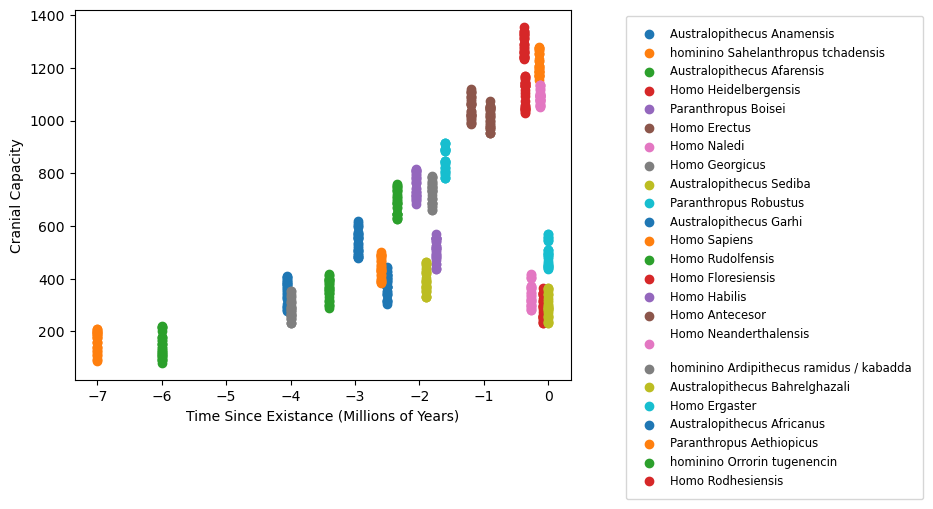

In [394]:
unique_species = ev_data['Genus_Species'].unique()
print(unique_species)
for species in unique_species:
    x_data = ev_data.loc[ev_data['Genus_Species'] == species, 'Avg_Time'] * -1
    y_data = ev_data.loc[ev_data['Genus_Species'] == species, 'Cranial_Capacity']
    plt.scatter(x_data, y_data)
    plt.xlabel('Time Since Existance (Millions of Years)')
    plt.ylabel('Cranial Capacity')

plt.legend(unique_species, bbox_to_anchor=(1.1,1), loc='upper left', fontsize = 'small', borderpad = 1)
plt.show
plt.close

## Brain power seems to have increased over time based on this plot. To confirm, we will check the correlation across the whole dataset, then look at an individual species.

In [395]:
cran_capac_time_corr, p = pearsonr(ev_data['Avg_Time'], ev_data['Cranial_Capacity'])
print(cran_capac_time_corr)

-0.5699854238943335


### This value is originally negative because the time reported is the time since existence based on current time. We multiplied by -1 to convert it to a more intuitive relative time.

#### There is not a very strong correlation with time and cranial capacity within the entire dataset. Is that due to variations between different species? Some must have been more intelligent than others. Next, we will look at an individual species over time.